<a href="https://colab.research.google.com/github/sarahdell/DSPS_SDellorco/blob/main/hw3/Dellorco_KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS

Edited by Sarah Dellorco
# Kolmogorov Smirnoff test, application to earthquake data

In [1]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


From the article, it states that the null hypothesis is "both data sets come from the same distribution," or in other words, the datasets are both samples of the same population.




    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The pivotal quantity is d_kl, which is "the maximum difference, in absolute value, between the rescaled cumulative distributions of the two data sets."

d_kl ≡ max_∀x|P_k(x) - P_l(x)|




    3 What does the probability distribution of this statistic depend on?
    
   


It depends only on the number of data N in each of the two datasets we are comparing.


    

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/MLPNS2021/tree/main/HW2_NHRT takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [39]:
df=pd.read_csv('https://raw.githubusercontent.com/sarahdell/DSPS_SDellorco/main/hw3/earthquakes_SDellorco.txt', sep=' ', skipinitialspace=True)

In [2]:
#df=pd.read_csv('https://transfer.sh/8kf4qHte5i/earthquakes_SDellorco.txt', sep = ' ',skipinitialspace=True)
#df=pd.read_csv('earthquakes_SDellorco.txt', sep = ' ')

In [3]:
# drive.mount('/content/drive', force_remount = True)
# file = pd.read_csv('/content/drive/MyDrive/Earthquakes_MSarfraz.txt', sep =' ') #skippinginitial. to get rid of NaN
# from google.colab import drive
# drive.mount('/content/drive')

running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [40]:
df.shape #gives the dimensions of the dataframe

(77955, 13)

In [41]:
df.head() #gives first 5 rows

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


In [6]:
df.describe() #gives min, max, quartiles, mean, std, size

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,77955.000000,77955.000000,77955.000000,77955.000000,7.795500e+04,77955.000000,77955.000000
mean,2.423602,34.043113,-116.879284,5.112988,3.778819e+06,30.751446,180.812251
std,0.411654,1.142951,1.052388,4.115084,3.462785e+06,22.101140,228.944081
min,2.000000,30.094830,-121.760000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.130000,33.189000,-117.656000,2.200000,7.446010e+05,16.000000,61.000000
50%,2.310000,34.121000,-116.587000,5.000000,3.054507e+06,25.000000,116.000000
75%,2.600000,34.617000,-116.273000,6.400000,7.045222e+06,39.000000,220.000000
max,7.300000,37.985500,-113.719000,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [7]:
df2 = df[['#YYY/MM/DD', 'HH:mm:SS.ss','MAG']].copy()

In [8]:
df2.set_axis(['date', 'time', 'mag'], axis='columns', inplace=True)
#I found it easier to use .set_axis rather than .rename; rename seems to work better with dictionaries
df2.head()

<ipython-input-8-3ee42ee6ffbc>:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df2.set_axis(['date', 'time', 'mag'], axis='columns', inplace=True)


,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,13:50:47.62,2.25


In [9]:
df2.describe()

,mag
count,77955.000000
mean,2.423602
std,0.411654
min,2.000000
25%,2.130000
50%,2.310000
75%,2.600000
max,7.300000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [10]:
df2.time.dtype, df2.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [11]:
df2['datetime'] = pd.to_datetime(df2['date'] + ' ' + df2['time'])
df2 = df2.drop(['date', 'time'], axis=1)


In [12]:
df2.head()

,mag,datetime
0,2.02,1984-01-01 01:30:57.520
1,2.12,1984-01-01 05:31:34.160
2,2.43,1984-01-01 06:59:05.140
3,2.07,1984-01-01 11:10:25.290
4,2.25,1984-01-01 13:50:47.620


## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [13]:
#list of year ranges
#year_ranges = [(1984, 1986.5), (1990.3, 1992.1), (1994.6, 1995.6),
              #  (1996.1, 1996.5), (1997, 1997.6), (1997.75, 1998.15),
              #  (1998.25, 1999.35), (2000.55, 2000.8), (2000.9, 2001.25),
              #  (2001.6, 2002), (2002.5, 2003)]

In [14]:
#List of year, month, and day ranges
year_month_day_ranges = [(1984, 1, 1, 1986, 7, 2),  # January 1, 1984, to July 2, 1986
                         (1990, 4, 19, 1992, 2, 6),  # April 19, 1990, to February 6, 1992
                         (1994, 8, 8, 1995, 8, 8),  # August 8, 1994, to August 8, 1995
                         (1996, 2, 6, 1996, 7, 2),  # February 6, 1996, to July 2, 1996
                         (1997, 1, 1, 1997, 8, 7),  # January 1, 1997, to August 7, 1997
                         (1997, 10, 1, 1998, 2, 24),  # October 1, 1997, to February 24, 1998
                         (1998, 4, 2, 1999, 5, 7),  # April 2, 1998, to May 7, 1999
                         (2000, 7, 20, 2000, 10, 19),  # July 20, 2000, to October 19, 2000
                         (2000, 11, 24, 2001, 4, 2),  # November 24, 2000, to April 2, 2001
                         (2001, 8, 7, 2002, 12, 31),  # August 7, 2001, to December 31, 2002
                         (2002, 7, 2, 2003, 12, 31)]  # July 2, 2002, to December 31, 2003
#These years were manually calculated based on the decimals in the commented out cell above
filtered_dfs = [] #creates empty list to store the stationary values

# Loop through each year, month, and day range and filter rows
for start_year, start_month, start_day, end_year, end_month, end_day in year_month_day_ranges:
    # Create datetime objects for start and end dates
    start_date = pd.to_datetime(f"{start_year}-{start_month:02d}-{start_day:02d}", format='%Y-%m-%d')
    end_date = pd.to_datetime(f"{end_year}-{end_month:02d}-{end_day:02d}", format='%Y-%m-%d')

    # Filter rows based on the datetime column
    filtered_df = df2[(df2['datetime'] >= start_date) & (df2['datetime'] <= end_date)]

    # Append the filtered DataFrame to the list
    filtered_dfs.append(filtered_df)

# Concatenate the filtered DataFrames into one DataFrame
filtered_df = pd.concat(filtered_dfs)

In [15]:
filtered_df.head()

,mag,datetime
0,2.02,1984-01-01 01:30:57.520
1,2.12,1984-01-01 05:31:34.160
2,2.43,1984-01-01 06:59:05.140
3,2.07,1984-01-01 11:10:25.290
4,2.25,1984-01-01 13:50:47.620


In [16]:
num_values = filtered_df.shape[0]
print(f"Number of values in the new DataFrame: {num_values}")

Number of values in the new DataFrame: 21740


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.:

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```).


In [17]:
filtered_df = filtered_df.sort_values(by='datetime') #sorts datetime in ascending order
datetime_values = filtered_df['datetime'].values #converts the column to an array
time_intervals = np.diff(datetime_values) #finds time interval between earthquakes

In [18]:
filtered_df = filtered_df.reset_index(drop=True) # reset index so difference calculations are accurate
time_intervals = np.insert(time_intervals, 21739, 0) #added zero since it is the last datapoint and there's nothing after it. This resolves the NaT error described below.
filtered_df['gaps'] = pd.Series(time_intervals, dtype='timedelta64[ns]')  #makes the values report in nanoseconds
filtered_df['gaps'] = filtered_df['gaps'].dt.total_seconds() * 1e9 #overrides pandas automatic formatting to keep it in nanoseconds

In [19]:
filtered_df['gaps']

0        1.443664e+13
1        5.250980e+12
2        1.508015e+13
3        9.622330e+12
4        2.085217e+13
             ...     
21735    1.914806e+13
21736    3.753089e+13
21737    2.900680e+12
21738    1.562520e+12
21739    0.000000e+00
Name: gaps, Length: 21740, dtype: float64

Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

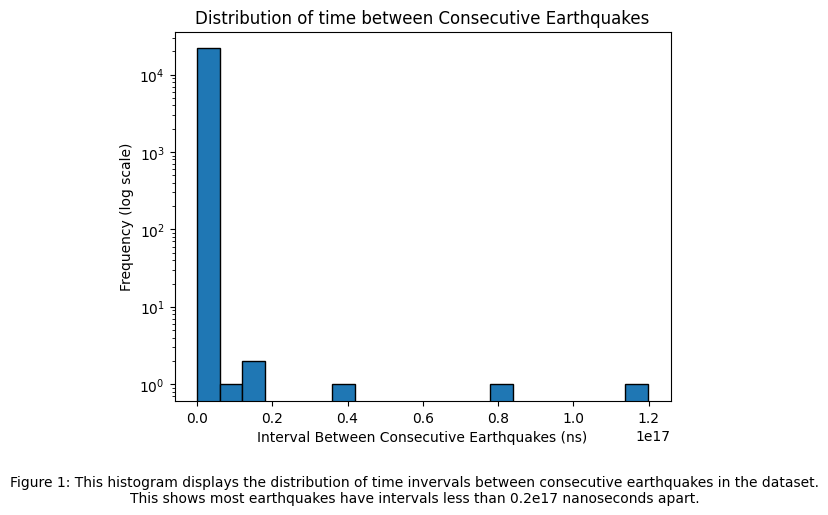

In [20]:
gaps_values = filtered_df['gaps']

# Create a histogram with a logarithmic y-axis
gaps_values.plot(kind='hist', bins=20, edgecolor='k', logy=True)

plt.xlabel('Interval Between Consecutive Earthquakes (ns)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of time between Consecutive Earthquakes')

plt.figtext(0.5, -0.1, 'Figure 1: This histogram displays the distribution of time invervals between consecutive earthquakes in the dataset.\nThis shows most earthquakes have intervals less than 0.2e17 nanoseconds apart.', ha='center')

plt.show()


The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [21]:
# I am using 30 days = 1 month, so by that definition there are 2,592,000,000,000 nanoseconds in one month
threshold = 2.592e15  # 2,592,000,000,000 nanoseconds as the threshold value
new_filtered_df = filtered_df[filtered_df['gaps'] < threshold].copy() #giving this a new dataframe so the old one is still saved. Contains only values less than threshold


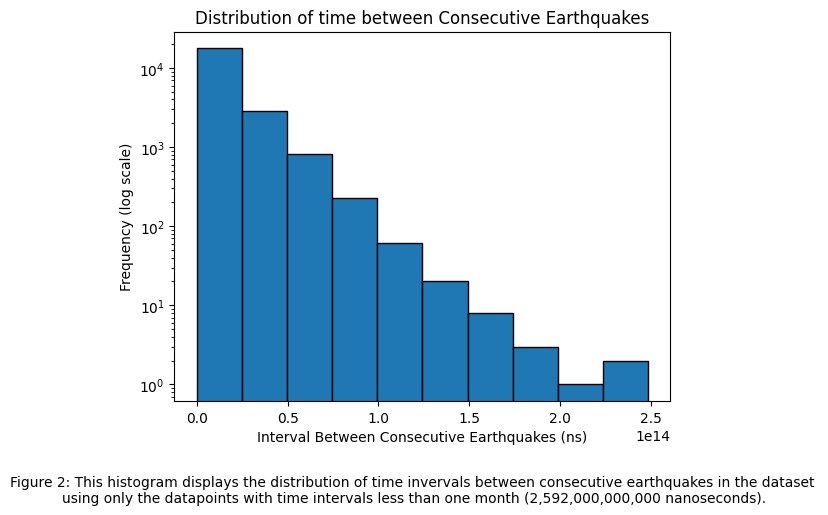

In [22]:
new_gaps_values = new_filtered_df['gaps']

new_gaps_values.plot(kind='hist', bins=10, edgecolor='k', logy=True)

plt.xlabel('Interval Between Consecutive Earthquakes (ns)')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of time between Consecutive Earthquakes')

text = "Figure 2: This histogram displays the distribution of time invervals between consecutive earthquakes in the dataset \nusing only the datapoints with time intervals less than one month (2,592,000,000,000 nanoseconds)."
plt.figtext(0.5, -0.1, text, ha='center')

plt.show()

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_pseudocode.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

**We basically have six steps we have to do based on the section of Corral.**
1. Rescale the inter-event times for each dataset.
2. Calculate the mean inter-event time. (Rk=1/mean)
3. Trim the data based on the threshold 'm'.
4. Repeat the rescaling and trimming process iteratively.
5. Perform the KS test to compare the cumulative distributions.
6. This will give the KS statistic and p-values.

In [23]:
#STEP 1
#defining a function that creates a dataframe with magnitude values greater than Mk

def Mk_filter(Mk):
  result = new_filtered_df[new_filtered_df['mag'] >= Mk].copy()
  result = result.reset_index(drop=True) # reset index so difference calculations are accurate
  return result

Mk2=Mk_filter(2)
Mk25=Mk_filter(2.5)
Mk3=Mk_filter(3)
Mk35=Mk_filter(3.5)
Mk4=Mk_filter(4)

In [24]:
#STEP 2 and 3
# Function to calculate the mean and rescale data
def calculate_mean_and_rescale(data, threshold):
    mean = np.mean(data)
    rescaled_data = data * (1 / mean)
    return rescaled_data[rescaled_data > threshold]


In [25]:
#STEP 4
filtered_MK2_01=calculate_mean_and_rescale(Mk2['gaps'],0.01)
filtered_MK2_01=calculate_mean_and_rescale(filtered_MK2_01,0.01)
filtered_MK2_01

0        0.938585
1        0.341388
2        0.980422
3        0.625587
4        1.355685
           ...   
21725    0.094915
21726    1.244894
21727    2.440037
21728    0.188585
21729    0.101586
Name: gaps, Length: 20015, dtype: float64

In [26]:
filtered_MK25_01=calculate_mean_and_rescale(Mk25['gaps'],0.01)
filtered_MK25_01=calculate_mean_and_rescale(filtered_MK25_01,0.01)
filtered_MK25_01

0       0.779842
1       0.295477
3       0.090247
4       0.057893
5       0.874246
          ...   
6642    1.321545
6644    0.122914
6646    0.128458
6648    1.868422
6653    0.112616
Name: gaps, Length: 6044, dtype: float64

In [27]:
filtered_MK3_01=calculate_mean_and_rescale(Mk3['gaps'],0.01)
filtered_MK3_01=calculate_mean_and_rescale(filtered_MK3_01,0.01)
filtered_MK3_01

0       0.893875
1       0.010314
2       0.066358
3       1.002084
4       2.354627
          ...   
1714    0.949512
1716    0.855334
1718    0.047651
1720    0.260438
1722    0.147242
Name: gaps, Length: 1539, dtype: float64

In [28]:
filtered_MK35_01=calculate_mean_and_rescale(Mk35['gaps'],0.01)
filtered_MK35_01=calculate_mean_and_rescale(filtered_MK35_01,0.01)
filtered_MK35_01

0      0.275630
1      0.340978
2      1.350135
3      0.244046
4      0.038518
         ...   
484    4.624790
486    0.048456
488    0.273646
490    0.561923
492    0.060834
Name: gaps, Length: 432, dtype: float64

In [29]:
filtered_MK4_01=calculate_mean_and_rescale(Mk4['gaps'],0.01)
filtered_MK4_01=calculate_mean_and_rescale(filtered_MK4_01,0.01)
filtered_MK4_01

0      0.052829
1      0.125784
2      0.055717
3      0.108543
4      0.017616
         ...   
128    0.180243
130    6.343007
132    0.066458
134    0.375312
136    0.083436
Name: gaps, Length: 127, dtype: float64

In [30]:
filtered_MK2_001=calculate_mean_and_rescale(Mk2['gaps'],0.001)
filtered_MK2_001=calculate_mean_and_rescale(filtered_MK2_001,0.001)
filtered_MK2_001

0        0.978396
1        0.355868
2        1.022007
3        0.652122
4        1.413187
           ...   
21725    0.098941
21726    1.297697
21727    2.543532
21728    0.196584
21729    0.105895
Name: gaps, Length: 20915, dtype: float64

In [31]:
filtered_MK25_001=calculate_mean_and_rescale(Mk25['gaps'],0.001)
filtered_MK25_001=calculate_mean_and_rescale(filtered_MK25_001,0.001)
filtered_MK25_001

0       0.822309
1       0.311568
2       0.009488
3       0.095161
4       0.061045
          ...   
6646    0.135454
6648    1.970170
6650    0.003586
6652    0.002291
6653    0.118749
Name: gaps, Length: 6398, dtype: float64

In [32]:
filtered_MK3_001=calculate_mean_and_rescale(Mk3['gaps'],0.001)
filtered_MK3_001=calculate_mean_and_rescale(filtered_MK3_001,0.001)
filtered_MK3_001

0       0.958209
1       0.011056
2       0.071134
3       1.074206
4       2.524095
          ...   
1716    0.916894
1718    0.051080
1720    0.279182
1722    0.157840
1724    0.004179
Name: gaps, Length: 1660, dtype: float64

In [33]:
filtered_MK35_001=calculate_mean_and_rescale(Mk35['gaps'],0.001)
filtered_MK35_001=calculate_mean_and_rescale(filtered_MK35_001,0.001)
filtered_MK35_001

0      0.291128
1      0.360151
2      1.426050
3      0.257768
4      0.040684
         ...   
484    4.884830
486    0.051180
488    0.289032
490    0.593518
492    0.064255
Name: gaps, Length: 467, dtype: float64

In [34]:
filtered_MK4_001=calculate_mean_and_rescale(Mk4['gaps'],0.001)
filtered_MK4_001=calculate_mean_and_rescale(filtered_MK4_001,0.001)
filtered_MK4_001

0      0.053241
1      0.126766
2      0.056152
3      0.109390
4      0.017753
         ...   
128    0.181650
130    6.392517
132    0.066977
134    0.378241
136    0.084087
Name: gaps, Length: 128, dtype: float64

In [35]:
#STEPS 5 and 6
norms01=[filtered_MK2_01, filtered_MK25_01, filtered_MK3_01, filtered_MK35_01, filtered_MK4_01]
norms001=[filtered_MK2_001, filtered_MK25_001, filtered_MK3_001, filtered_MK35_001, filtered_MK4_001]
set01=[]
set001=[]
for i in range(5):
  for j in range(5):
    set01.append(sp.stats.ks_2samp(norms01[i], norms01[j]))
    set001.append(sp.stats.ks_2samp(norms001[i], norms001[j]))

set001

[KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0010009880057729958, statistic_sign=1),
 KstestResult(statistic=0.03735893590342487, pvalue=2.2370230788092248e-06, statistic_location=0.11517358372531769, statistic_sign=-1),
 KstestResult(statistic=0.10339296463885664, pvalue=9.081308719008293e-15, statistic_location=0.1480362647748702, statistic_sign=-1),
 KstestResult(statistic=0.1775395567149792, pvalue=4.511805073239026e-13, statistic_location=0.09460558427584544, statistic_sign=-1),
 KstestResult(statistic=0.28431710196031557, pvalue=1.4074573847784234e-09, statistic_location=0.1721830260575046, statistic_sign=-1),
 KstestResult(statistic=0.03735893590342487, pvalue=2.2370230788092248e-06, statistic_location=0.11517358372531769, statistic_sign=1),
 KstestResult(statistic=0.0, pvalue=1.0, statistic_location=0.0010464936837817885, statistic_sign=1),
 KstestResult(statistic=0.06728778194993164, pvalue=1.2335702853786068e-05, statistic_location=0.14907770724345024, statis

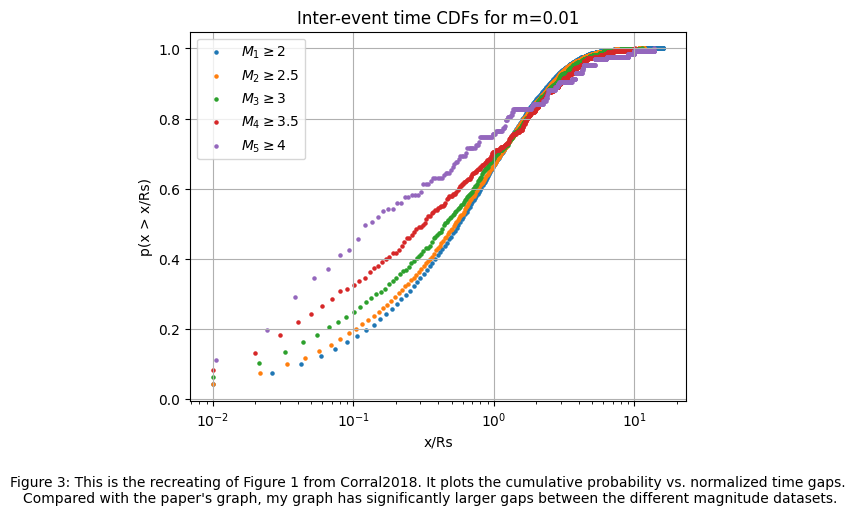

In [36]:
#Recreating Figure 1
plt.scatter(np.histogram(filtered_MK2_01, bins = 1000)[1][:-1] / filtered_MK2_01.mean(), np.cumsum(np.histogram(filtered_MK2_01, bins = 1000)[0])/np.cumsum(np.histogram(filtered_MK2_01, bins = 1000)[0])[-1], s = 5, label = r'$M_1 \geq 2$')
plt.scatter(np.histogram(filtered_MK25_01, bins = 1000)[1][:-1] / filtered_MK25_01.mean(), np.cumsum(np.histogram(filtered_MK25_01, bins = 1000)[0])/np.cumsum(np.histogram(filtered_MK25_01, bins = 1000)[0])[-1], s = 5, label = r'$M_2 \geq 2.5$')
plt.scatter(np.histogram(filtered_MK3_01, bins = 1000)[1][:-1] / filtered_MK3_01.mean(), np.cumsum(np.histogram(filtered_MK3_01, bins = 1000)[0])/np.cumsum(np.histogram(filtered_MK3_01, bins = 1000)[0])[-1], s = 5, label = r'$M_3 \geq 3$')
plt.scatter(np.histogram(filtered_MK35_01, bins = 1000)[1][:-1] / filtered_MK35_01.mean(), np.cumsum(np.histogram(filtered_MK35_01, bins = 1000)[0])/np.cumsum(np.histogram(filtered_MK35_01, bins = 1000)[0])[-1], s = 5, label = r'$M_4 \geq 3.5$')
plt.scatter(np.histogram(filtered_MK4_01, bins = 1000)[1][:-1] / filtered_MK4_01.mean(), np.cumsum(np.histogram(filtered_MK4_01, bins = 1000)[0])/np.cumsum(np.histogram(filtered_MK4_01, bins = 1000)[0])[-1], s = 5, label = r'$M_5 \geq 4$')
plt.legend()
plt.xlabel("x/Rs")
plt.ylabel("p(x > x/Rs)")
plt.xscale("log")
plt.title("Inter-event time CDFs for m=0.01")
plt.grid()
text = "Figure 3: This is the recreating of Figure 1 from Corral2018. It plots the cumulative probability vs. normalized time gaps. \nCompared with the paper's graph, my graph has significantly larger gaps between the different magnitude datasets."
plt.figtext(0.5, -0.1, text, ha='center')
plt.show()

| m = 0.01 | N | M >= 2.0 | M >= 2.5 | M >= 3.0 | M >= 3.5 | M >= 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M >= 2.0 | 20015 | - | 0.03% | 0% | 0% | 0% |
|M >= 2.5 | 6044 | 0.031 | - | 0.02% | 0% | 0% |
|M >= 3.0 | 1539 | 0.089 | 0.067 | - | 1.07% | 0% |
|M >= 3.5 | 432 | 0.164 | 0.138 | 0.087 | - | 1.73% |
|M >= 4.0 | 127 | 0.308 | 0.279 | 0.229 | 0.153 | - | *italicized text*

| m = 0.001 | N | M >= 2.0 | M >= 2.5 | M >= 3.0 | M >= 3.5 | M >= 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M >= 2.0 | 20915 | - | 0% | 0% | 0% | 0% |
|M >= 2.5 | 6398 | 0.037 | - | 0% | 0% | 0% |
|M >= 3.0 | 1660 | 0.103 | 0.067 | - | 1.11% | 0.025% |
|M >= 3.5 | 467 | 0.1775 | 0.144 | 0.084 | - | 11.94% |
|M >= 4.0 | 128 | 0.284 | 0.250 | 0.192 | 0.116 | - |

# Tables: Above the diagonal reports the p-values as percentages. Below the diagonal reports the statistic (d, the difference between the two distributions).

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

In my case, since all of the p-values are less than the 3-sigma p-value of 0.003, all of them would lead you to reject the null hypothesis that the two samples come from the same population distribution. This is inconsistent with the results from Corral2018. I do not know what I did differently to produce these results that are so drastically different from the paper's.

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [37]:
# # your code here

# pl.imshow((ks_001));
# pl.axis('off')
# cb = pl.colorbar()
# cb.ax.set_ylabel(r'$p$-value')
# pl.title("KS test results");
# #add a caption


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

# Changing the p-value used as a threshold changes the percentage of data that is acceptable and the error associated with it. In many real-life scenarios, like in medicine, for example, these statistics could be life-altering. If scientists established a p-value of 0.001, for example, it means that only 0.1% of the time should data fall outside of that desired range. If the p-value was changed to 0.05, that would be that 5% of the time (1/20 times) the data would fall outside of that range. It leads to inconsistencies that have significant effects on any real-world results that come from those statistics. Switching to a larger p-value to force a result could falsify the error associated with a product or experiment and make it ineffective in use.

Redoing it for threshold 0001